# Búsqueda de atributos

Esta notebook es para generar nuevos atributos para el dataframe


In [24]:
%pylab inline
# Esto agrega al python path el directorio ..
import sys
sys.path.append("..")

import numpy as np
import config
from transformers import transformer
from data_builder import load_test_data, load_dev_data, load_small_dev_data


df, target = load_small_dev_data()

Populating the interactive namespace from numpy and matplotlib


# From y to

Veamos la pinta de los remitentes y recipientes

Primero, agarro algo de spam y ham

In [32]:
receivers = df.parsed_emails.apply(lambda p: p.get_all("To") or p.get_all("to") or [])
senders = df.parsed_emails.apply(lambda p: p.get_all("From") or p.get_all("from") or [])

def join_mails(t):
    return ";".join(t)

df['from_text'] = senders.apply(join_mails)
df['to_text'] = receivers.apply(join_mails)

In [33]:
spam = df[target].sample(30)
ham = df[target == False].sample(30)



In [34]:
print "Enviadores de spam"
print "="* 100
print "\n".join(spam.from_text)
print "\n\nEnviadores de ham"
print "="* 100
print "\n".join(ham.from_text)


Enviadores de spam
<nicolas.ellison>
"Watchmen O. Homiest" <chinagorom.kelechi@acnielsen-ng.com>
"Jeffery Farley" <jeffery.farleymt@wxs.nl>
"giveaway consumer research gift dept." <andressampson#####>
"catalina romero" <jzqyeiphh#####>
=?Windows-1251?B?Y2hpLXRhaQ==?= <afrid@acadia.net>
Zoe  Donaldson <ukdaxguzjml@certifiedmail.com>
"donya nichols" <reuben@hosannamail.com>
"fidel pritchard" <tykdqknrjlkf#####>
"a touch of class" <atouchofclass#####>
"Jared Yazzie" <phzprmnvrznr@yahoo.com>
"Klahan Renteria" <Ilta@jeromegroup.com>
"¬fÁp¤å¤Æ¨Æ·~ªÑ¥÷¦³­­¤½¥q" <brmy.ui@msa.hinet.net>
"alexis hickey" <uijbdnkkbnrmfq#####>
=?GB2312?B?tc/Rxw==?= <381048041@qq.com>
Noreply <noreply@usg-jobsupport.com>
"°í°´¼¾Å¸" <ruyjs546yerytfghf@yahoo.co.kr>
Paul A. Davis <bamber@access-one.com>
"scott" <scott#####>
"Travelocity.com" <feedback@travelocity.m0.net>
=?utf-8?q?Neville Dae?= <categorizeremymfe@speedacm.org>
"shirley page" <page_jn#####-warburg.de>
"legal services" <superdeals1#####>
"Leah Farley" <

In [35]:
print "Receptores de spam"
print "="* 100
print "\n".join(spam.to_text)
print "\nReceptores de ham"
print "="* 100
print "\n".join(ham.to_text)


Receptores de spam
<jkoutsi#####>
chris.germany <chris.germany@enron.com>
Kam.Keiser@ENRON.com
<paliourg#####>
<derm#####>
michael.e.taylor@enron.com
gwhalle <gwhalle@enron.com>
"Helga Arnold" <MWHITT@ENRON.COM>
<paliourg#####>
##########
Michael.E.Taylor@enron.com, gstorey@ect.enron.com, gstorey@exchange.enron.com, Tom.Donohoe@enron.com, KHOLST@ENRON.COM, Shelley.Corman@ENRON.com, Rshapiro@enron.com
"Evita Lancaster" <Rod.Hayslett@enron.com>
JREITME@ECT.ENRON.COM
<paliourg#####>
shelley.corman@enron.com
Richard.Shapiro <Richard.Shapiro@enron.com>
Tom.Donohoe@enron.com
Tom.Donohoe@enron.com
##########
KHOLST@enron.com
=?utf-8?q?Laurence Wne?= <Martin.Cuilla@ENRON.com>
<paliourg#####>
<paliourg#####>
<Lisa.Gang@enron.com>
mark.dana.davis@enron.com
<paliourg#####>
Rod.Hayslett@ENRON.com
<paliourg#####>
##########
##########

Receptores de ham
undisclosed-recipients:;
sandeep.kohli#####
vince.kaminski#####
"DL-GA-all_enron_worldwide4" <DL-GA-all_enron_worldwide4@ENRON.com>
"Corman, Shelle

In [36]:
import re

first_ham = ham.iloc[0]

re.findall(r'<.*>', first_ham.to_text)

print df.number_of_receivers.unique()

AttributeError: 'DataFrame' object has no attribute 'number_of_receivers'

In [6]:

print "NON ASCII totales: {}".format(np.count_nonzero(df.from_non_ascii == False))

print "NON ASCII (con clase spam): {}".format(np.count_nonzero(df[df.from_non_ascii == False]['class'] == 'spam'))
print "NON ASCII (con clase spam): {}".format(np.count_nonzero(df[df.from_non_ascii == False]['class'] == 'ham'))



NON ASCII totales: 279
NON ASCII (con clase spam): 279
NON ASCII (con clase spam): 0


# Distribución horaria y por día


(array([  314.,   291.,   598.,  1021.,   796.,   871.,   392.,   173.]),
 array([  0.   ,   2.875,   5.75 ,   8.625,  11.5  ,  14.375,  17.25 ,
         20.125,  23.   ]),
 <a list of 8 Patch objects>)

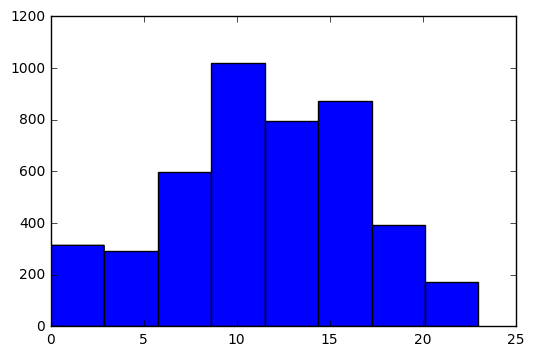

In [7]:
ham = df[df['class'] == 'ham']
spam = df[df['class'] == 'spam']

hist(ham.hour, range=[0, 23], bins=8)


(array([ 550.,  558.,  528.,  520.,  564.,  514.,  524.,  548.]),
 array([  0.   ,   2.875,   5.75 ,   8.625,  11.5  ,  14.375,  17.25 ,
         20.125,  23.   ]),
 <a list of 8 Patch objects>)

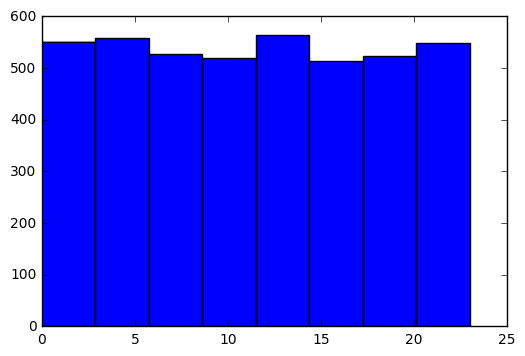

In [8]:

hist(spam.hour, range=[0, 23], bins=8)

Podemos observar en los dos histogramas anteriores que mientras el spam se distribuye 

In [9]:
import random

df['day_of_month'] = df.date.apply(
    lambda d: d.day if d else random.choice(range(29))
)


(array([ 636.,  741.,  708.,  678.,  644.,  563.,  530.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

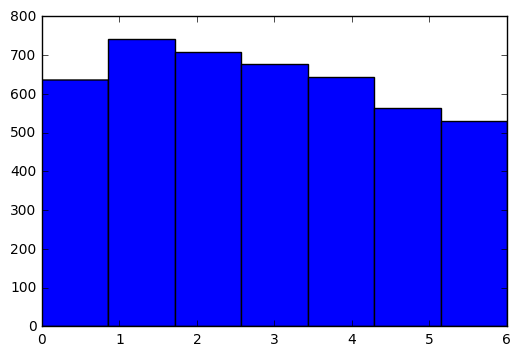

In [10]:
ham = df[df['class'] == 'ham']
spam = df[df['class'] == 'spam']



hist(spam['weekday'], bins=7)

(array([ 889.,  892.,  904.,  810.,  769.,  104.,  132.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

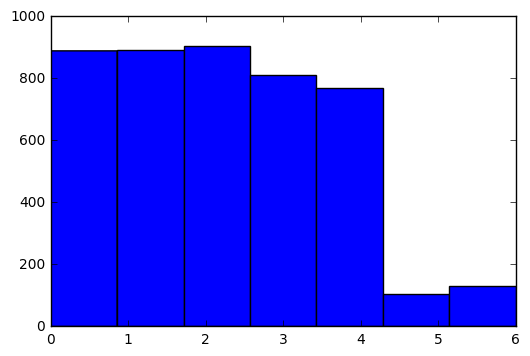

In [11]:
hist(ham['weekday'], bins=7)

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          3.10000000e+01,   7.04000000e+02,   4.10600000e+03,
          2.11900000e+03,   3.10000000e+01,   7.93000000e+02,
          1.12000000e+03,   9.00000000e+00,   1.40000000e+01,
          1.60000000e+01,   1.10000000e+01]),
 array([ 1990.,  1991.,  1992.,  1993.,  1994.,  1995.,  1996.,  1997.,
         1998.,  1999.,  2000.,  2001.,  2002.,  2003.,  2004.,  2005.,
         2006.,  2007.,  2008.,  2009.,  2010.]),
 <a list of 20 Patch objects>)

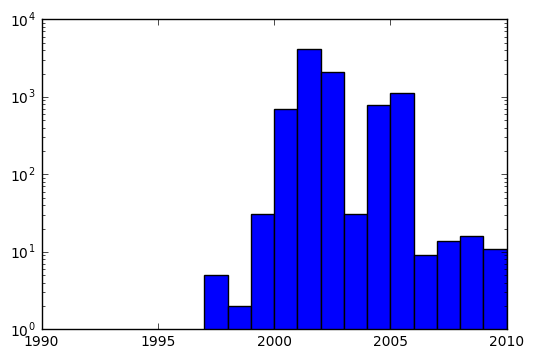

In [12]:
hist(df.year, range=[1990, 2010], bins=20, log=True)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.90000000e+01,   4.47000000e+03]),
 array([  400. ,   481.9,   563.8,   645.7,   727.6,   809.5,   891.4,
          973.3,  1055.2,  1137.1,  1219. ,  1300.9,  1382.8,  1464.7,
         1546.6,  1628.5,  1710.4,  1792.3,  1874.2,  1956.1,  2038. ]),
 <a list of 20 Patch objects>)

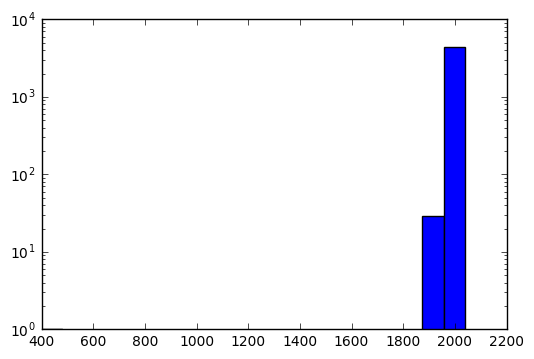

In [13]:
hist(spam.year, bins=20, log=True)

In [14]:
ham.year.unique()

array([2001, 2000, 2002, 1999])